Start

In [1]:
pip install composition_stats

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for composition-stats: filename=composition_stats-1.1.0-py3-none-any.whl size=13745 sha256=3714325bbb0172f98d11a1f860d16c2323f9fed1e0e325aeb3ebedc45dd25367
  Stored in directory: /root/.cache/pip/wheels/a5/36/b9/87081163b88e46bd21b4612d6e4b849d3d2157190872e4456f
Successfully built composition-stats


In [6]:
#create dataset
import numpy as np
import composition_stats as coda
import matplotlib.pyplot as plt
from sklearn import svm
a0 = np.array([10, 29, 20]) 
a1 = np.array([50, 41, 91])
X0 = np.random.dirichlet(a0, 500)
X1 = np.random.dirichlet(a1, 500)
X_org = np.concatenate((X0, X1), axis = 0)
#New transformed data using ilr transformation method
X = coda.ilr(X_org)
y = np.concatenate((np.ones(500), -np.ones(500)))

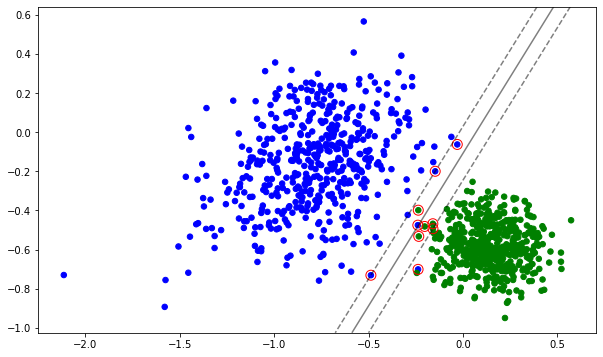

In [7]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)
def pltcolor(category):
    cols=[]
    for l in category:
        if l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
colors=pltcolor(y)
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, 
           linewidth=1, facecolors='none', edgecolors='r')
plt.show()